<a href="https://colab.research.google.com/github/misheljoy/Projects/blob/main/Walmart_Business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining Problem Statement
To identify customer purchase behavior against the customer’s gender,age, marital status and other factors. Come up with a customer profiling model from the exsisting customers by their purchase power


In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

--2023-04-05 12:43:35--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.65.40.103, 18.65.40.200, 18.65.40.33, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.65.40.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094’

walmart_data.csv?16 100%[===================>]  21.96M  74.3MB/s    in 0.3s    

2023-04-05 12:43:35 (74.3 MB/s) - ‘walmart_data.csv?1641285094’ saved [23027994/23027994]



# Analysing basic metrics
Observations on shape of data, data types of all the attributes, statistical summary

In [ ]:
# importing necessory modules for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
# analysing content of data
walmart = pd.read_csv("walmart_data.csv?1641285094")
walmart.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
# null value evaluation
walmart.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
walmart.shape

(550068, 10)

In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# No of unique customer Id
walmart.groupby("User_ID").ngroups

5891

In [ ]:
# Purchase Amount of each customers
userdata=walmart.groupby(["User_ID","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status"])["Purchase"].sum()
userdata = userdata.reset_index()
userdata = userdata.rename({"Purchase":"Purchase_Amount"},axis = 1)
userdata

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Amount
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4+,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001
...,...,...,...,...,...,...,...,...
5886,1006036,F,26-35,15,B,4+,1,4116058
5887,1006037,F,46-50,1,C,4+,0,1119538
5888,1006038,F,55+,1,C,2,0,90034
5889,1006039,F,46-50,0,B,4+,1,590319


In [ ]:
purchase_cnt = walmart.groupby(["User_ID"])["Purchase"].count()
purchase_cnt = purchase_cnt.reset_index()
purchase_cnt = purchase_cnt.rename({"Purchase":"Purchase_count"},axis = 1)
purchase_cnt

,User_ID,Purchase_count
0,1000001,35
1,1000002,77
2,1000003,29
3,1000004,14
4,1000005,106
...,...,...
5886,1006036,514
5887,1006037,122
5888,1006038,12
5889,1006039,74


In [ ]:
userdata = userdata.merge(purchase_cnt, on ="User_ID",how="inner")
userdata["Avg_purchase_Amt"]=np.round(userdata["Purchase_Amount"]/userdata["Purchase_count"],2)
userdata

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Amount,Purchase_count,Avg_purchase_Amt
0,1000001,F,0-17,10,A,2,0,334093,35,9545.51
1,1000002,M,55+,16,C,4+,0,810472,77,10525.61
2,1000003,M,26-35,15,A,3,0,341635,29,11780.52
3,1000004,M,46-50,7,B,2,1,206468,14,14747.71
4,1000005,M,26-35,20,A,1,1,821001,106,7745.29
...,...,...,...,...,...,...,...,...,...,...
5886,1006036,F,26-35,15,B,4+,1,4116058,514,8007.89
5887,1006037,F,46-50,1,C,4+,0,1119538,122,9176.54
5888,1006038,F,55+,1,C,2,0,90034,12,7502.83
5889,1006039,F,46-50,0,B,4+,1,590319,74,7977.28


In [ ]:
type(userdata)

pandas.core.frame.DataFrame

In [ ]:
userdata.shape

(5891, 10)

In [ ]:
# Statistical summary
userdata.describe(include="all")

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_Amount,Purchase_count,Avg_purchase_Amt
count,5.891000e+03,5891,5891,5891.000000,5891,5891,5891.000000,5.891000e+03,5891.000000,5891.000000
unique,NaN,2,7,NaN,3,5,NaN,NaN,NaN,NaN
top,NaN,M,26-35,NaN,C,1,NaN,NaN,NaN,NaN
freq,NaN,4225,2053,NaN,3139,2086,NaN,NaN,NaN,NaN
mean,1.003025e+06,NaN,NaN,8.153285,NaN,NaN,0.419963,8.650166e+05,93.374300,9568.839941
std,1.743379e+03,NaN,NaN,6.323140,NaN,NaN,0.493594,9.436445e+05,107.190049,1890.087093
min,1.000001e+06,NaN,NaN,0.000000,NaN,NaN,0.000000,4.668100e+04,6.000000,2318.730000
25%,1.001518e+06,NaN,NaN,3.000000,NaN,NaN,0.000000,2.376780e+05,26.000000,8287.215000
50%,1.003026e+06,NaN,NaN,7.000000,NaN,NaN,0.000000,5.212130e+05,54.000000,9386.210000
75%,1.004532e+06,NaN,NaN,14.000000,NaN,NaN,1.000000,1.119250e+06,117.000000,10654.630000


Observations:
* The given data set give informations like User_ID, Product_ID, Gender, Age, Occupation,	City_Category,	Stay_In_Current_City_Years,	Marital_Status,	Product_Category	and Purchase
*  The data set have 550068 rows and 10 columns
*   There are no null values in the given dataset
*   Out of 10 columns, 5 are numerical data and 5 are categorical data
*   A new data frame is deduced where the total purchase amount, number of purchases and average purchase amount of each customer is calculated.
*   4225 of 5891 customers are male
*   Purchase amount of users have large std deviations
---








# Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
gender = pd.DataFrame(userdata["Gender"].value_counts().reset_index())
gender.columns = ["Gender",'Count']
g = userdata.groupby("Gender")["Purchase_Amount"].mean()
gender = gender.merge(g.rename("Avg_purchase_Amt"),right_index= True,left_on="Gender")
gender

,Gender,Count,Avg_purchase_Amt
0,M,4225,925344.402367
1,F,1666,712024.394958


In [ ]:
age = pd.DataFrame(userdata["Age"].value_counts().reset_index())
age.columns = ["Age",'Count']
a = userdata.groupby("Age")["Purchase_Amount"].mean()
age = age.merge(a.rename("Avg_purchase_Amt"),right_index= True,left_on="Age")
age

,Age,Count,Avg_purchase_Amt
0,26-35,2053,989659.317097
1,36-45,1167,879665.710368
2,18-25,1069,854863.119738
3,46-50,531,792548.781544
4,51-55,481,763200.923077
5,55+,372,539697.244624
6,0-17,218,618867.811927


In [ ]:
Marital_Status = pd.DataFrame(userdata["Marital_Status"].value_counts().reset_index())
Marital_Status.columns = ["Marital_Status",'Count']
m = userdata.groupby("Marital_Status")["Purchase_Amount"].mean()
Marital_Status = Marital_Status.merge(m.rename("Avg_purchase_Amt"),right_index= True,left_on="Marital_Status")
Marital_Status

,Marital_Status,Count,Avg_purchase_Amt
0,0,3417,880575.781972
1,1,2474,843526.796686


In [ ]:
city = pd.DataFrame(userdata["City_Category"].value_counts().reset_index())
city.columns = ["City_Category",'Count']
c = userdata.groupby("City_Category")["Purchase_Amount"].mean()
city = city.merge(c.rename("Avg_purchase_Amt"),right_index= True,left_on="City_Category")
city

,City_Category,Count,Avg_purchase_Amt
0,C,3139,5.300438e+05
1,B,1707,1.239328e+06
2,A,1045,1.259781e+06


In [ ]:
Occupation = pd.DataFrame(userdata["Occupation"].value_counts().reset_index())
Occupation.columns = ["Occupation",'Count']
o= userdata.groupby("Occupation")["Purchase_Amount"].mean()
Occupation =Occupation.merge(o.rename("Avg_purchase_Amt"),right_index= True,left_on="Occupation")
Occupation

,Occupation,Count,Avg_purchase_Amt
0,4,740,9.003304e+05
1,0,688,9.235566e+05
2,7,669,8.331414e+05
3,1,517,8.213040e+05
4,17,491,8.009806e+05
5,12,376,8.123655e+05
6,14,294,8.824990e+05
7,20,273,1.086339e+06
8,2,256,9.297992e+05
9,16,235,1.014242e+06


In [ ]:
Stay_In_Current_City_Years = pd.DataFrame(userdata["Stay_In_Current_City_Years"].value_counts().reset_index())
Stay_In_Current_City_Years.columns = ["Stay_In_Current_City_Years",'Count']
s = userdata.groupby("Stay_In_Current_City_Years")["Purchase_Amount"].mean()
Stay_In_Current_City_Years = Stay_In_Current_City_Years.merge(s.rename("Avg_purchase_Amt"),right_index= True,left_on="Stay_In_Current_City_Years")
Stay_In_Current_City_Years

,Stay_In_Current_City_Years,Count,Avg_purchase_Amt
0,1,2086,859478.683126
1,2,1145,828972.865502
2,3,979,903884.227783
3,4+,909,864559.284928
4,0,772,884688.120466


Observation:


* Average purchase amount of males are higher than females
*  Average purchase amount of young people are higher than female
* Average Purchase amount of single people are slightly higher than married people
---

# Missing Value & Outlier Detection

In [ ]:
# null value evaluation
walmart.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

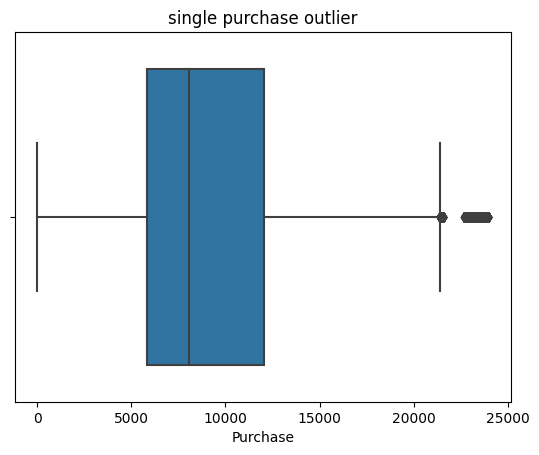

In [ ]:
sns.boxplot(data=walmart, x="Purchase")
plt.title('single purchase outlier')
plt.show()

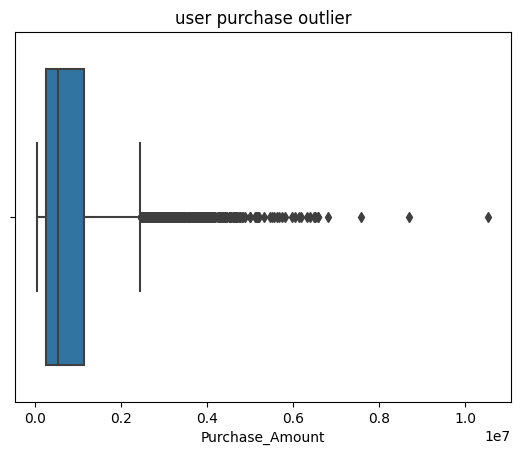

In [ ]:
sns.boxplot(data=userdata, x="Purchase_Amount")
plt.title('user purchase outlier')
plt.show()

Observation:
*   There are no null values in the given data set
*   Single puchases costing above 22k are considered outliers
*   Purchase behaviour of users change so drastically. there are many outliers


---







# Visual Analysis
Univariate

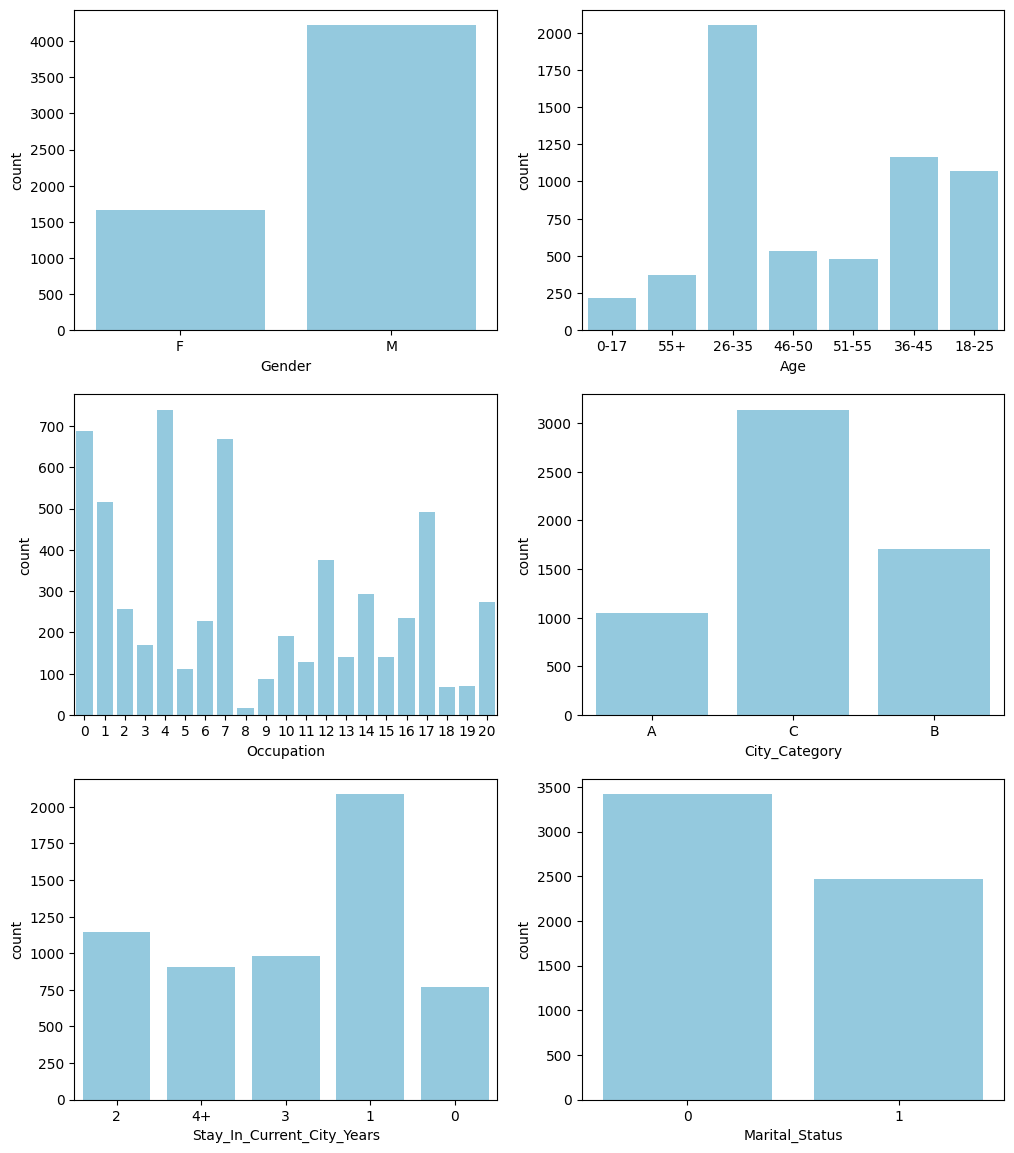

In [ ]:
# distribution graph is outdated hence not prefarable. For the visual analysis of the distribution of variables Histogram and Countplot are used
graph, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
graph.subplots_adjust(top=1.2)

sns.countplot( x=userdata["Gender"], ax=axis[0,0],color="skyblue")
sns.countplot( x=userdata["Age"], ax=axis[0,1],color="skyblue")
sns.countplot( x=userdata["Occupation"], ax=axis[1,0],color="skyblue")
sns.countplot( x=userdata["City_Category"], ax=axis[1,1],color="skyblue")
sns.countplot( x=userdata["Stay_In_Current_City_Years"] ,ax=axis[2,0],color="skyblue")
sns.countplot( x=userdata["Marital_Status"], ax=axis[2,1],color="skyblue")
plt.show()

Observation:
*   The number of Male users are considerably high than female users
*   There are more users from age category 26-35
*   Users from occupation category 8 are less
*   Users are more from city catogery c
*   Users living in the city about 1 yer are more in number
*   Users who are unmmaried are more than parnered people


---



# Correlation among different factors using Heatmaps or Pairplots

<Axes: >

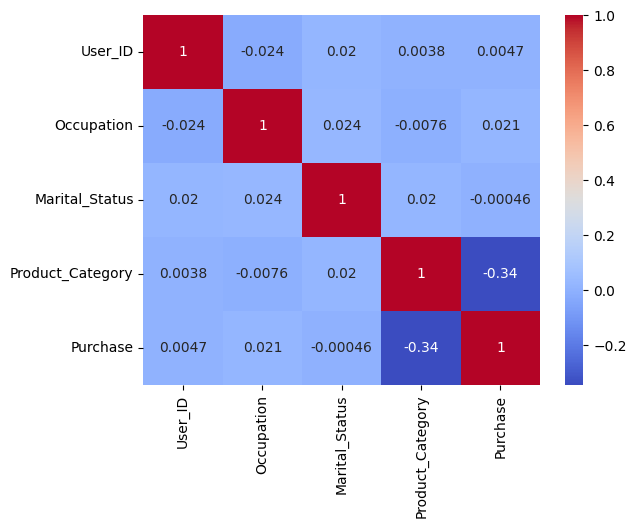

In [ ]:
sns.heatmap(walmart.corr(),annot = True,cmap ="coolwarm")

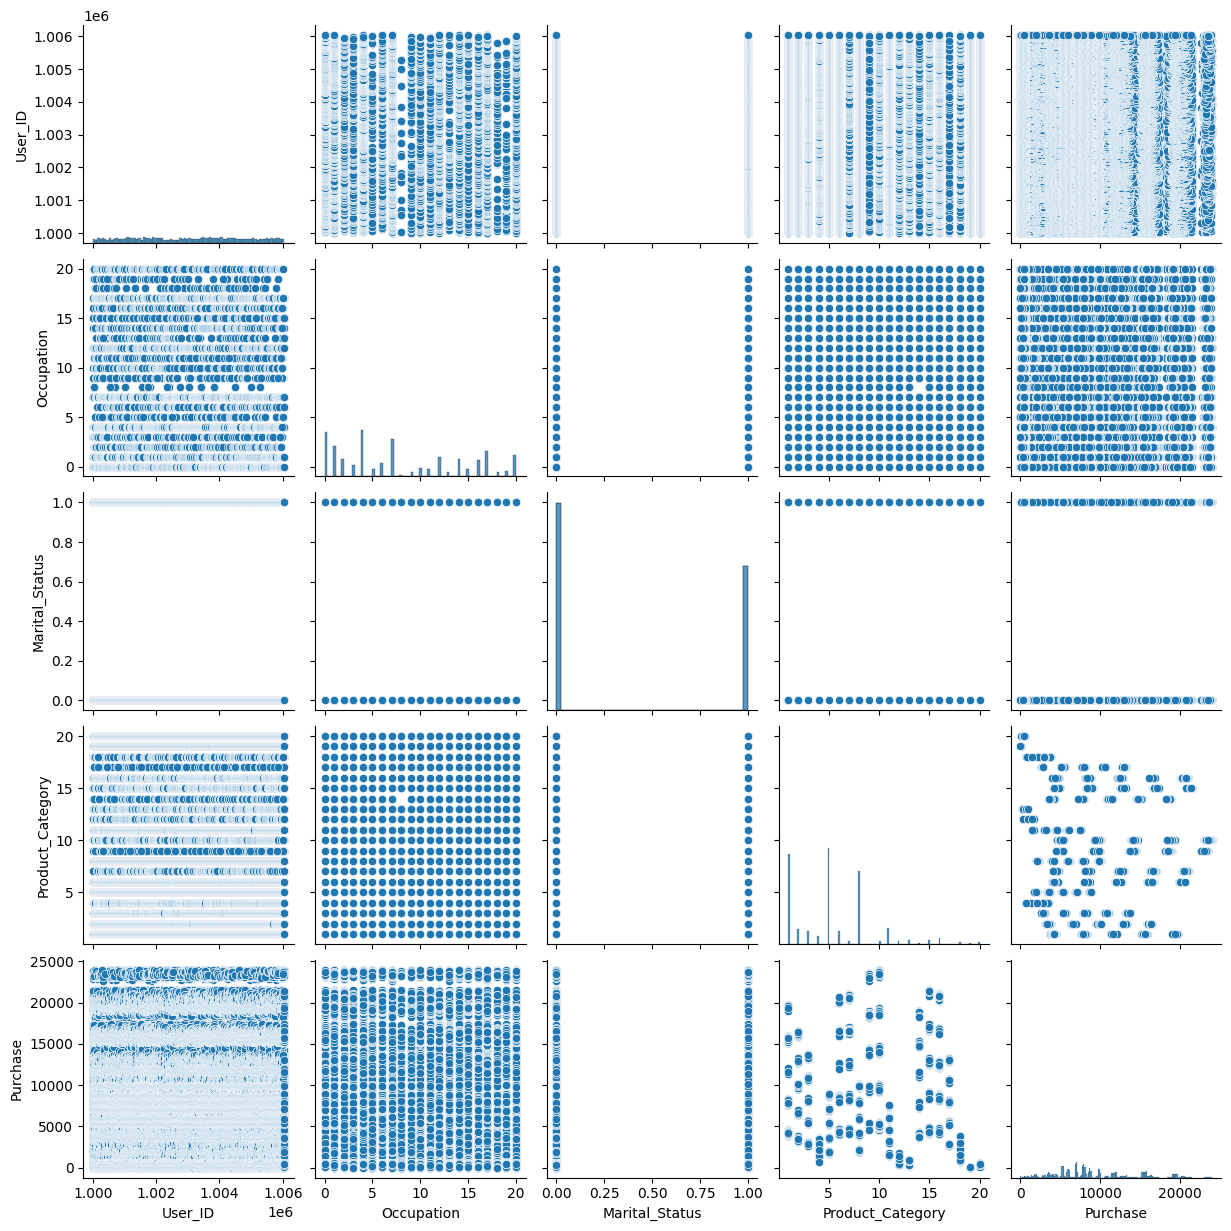

In [ ]:
sns.pairplot(walmart)

Observation:
*  Total purchase amount and number of purchases follow a linear relation

---





**Bivariate** **Analysis**

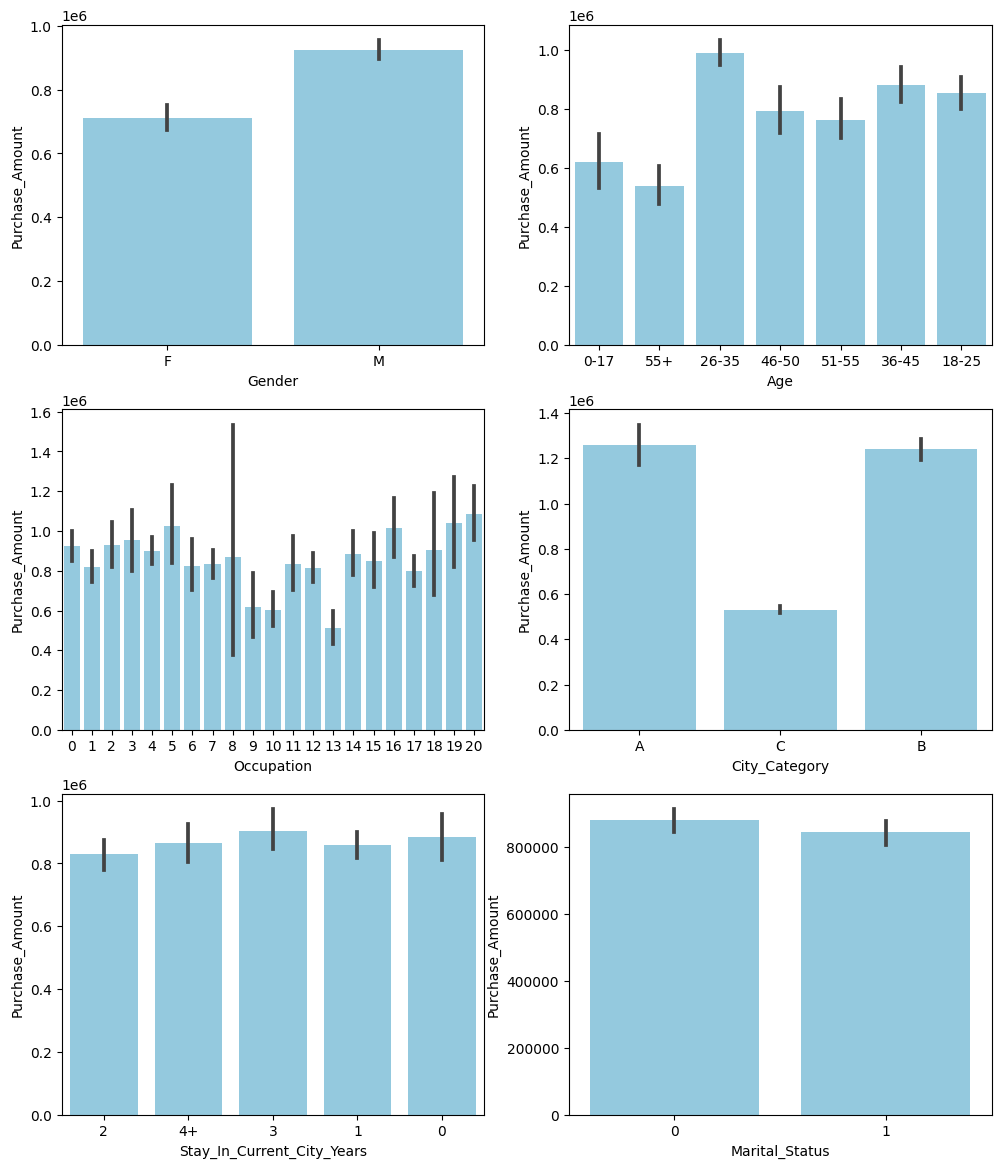

In [ ]:
graph, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
graph.subplots_adjust(top=1.2)

sns.barplot( x=userdata["Gender"],y= userdata["Purchase_Amount"], ax=axis[0,0],color="skyblue")
sns.barplot( x=userdata["Age"],y= userdata["Purchase_Amount"], ax=axis[0,1],color="skyblue")
sns.barplot( x=userdata["Occupation"],y= userdata["Purchase_Amount"], ax=axis[1,0],color="skyblue")
sns.barplot( x=userdata["City_Category"],y= userdata["Purchase_Amount"], ax=axis[1,1],color="skyblue")
sns.barplot( x=userdata["Stay_In_Current_City_Years"],y= userdata["Purchase_Amount"] ,ax=axis[2,0],color="skyblue")
sns.barplot( x=userdata["Marital_Status"],y= userdata["Purchase_Amount"], ax=axis[2,1],color="skyblue")
plt.show()

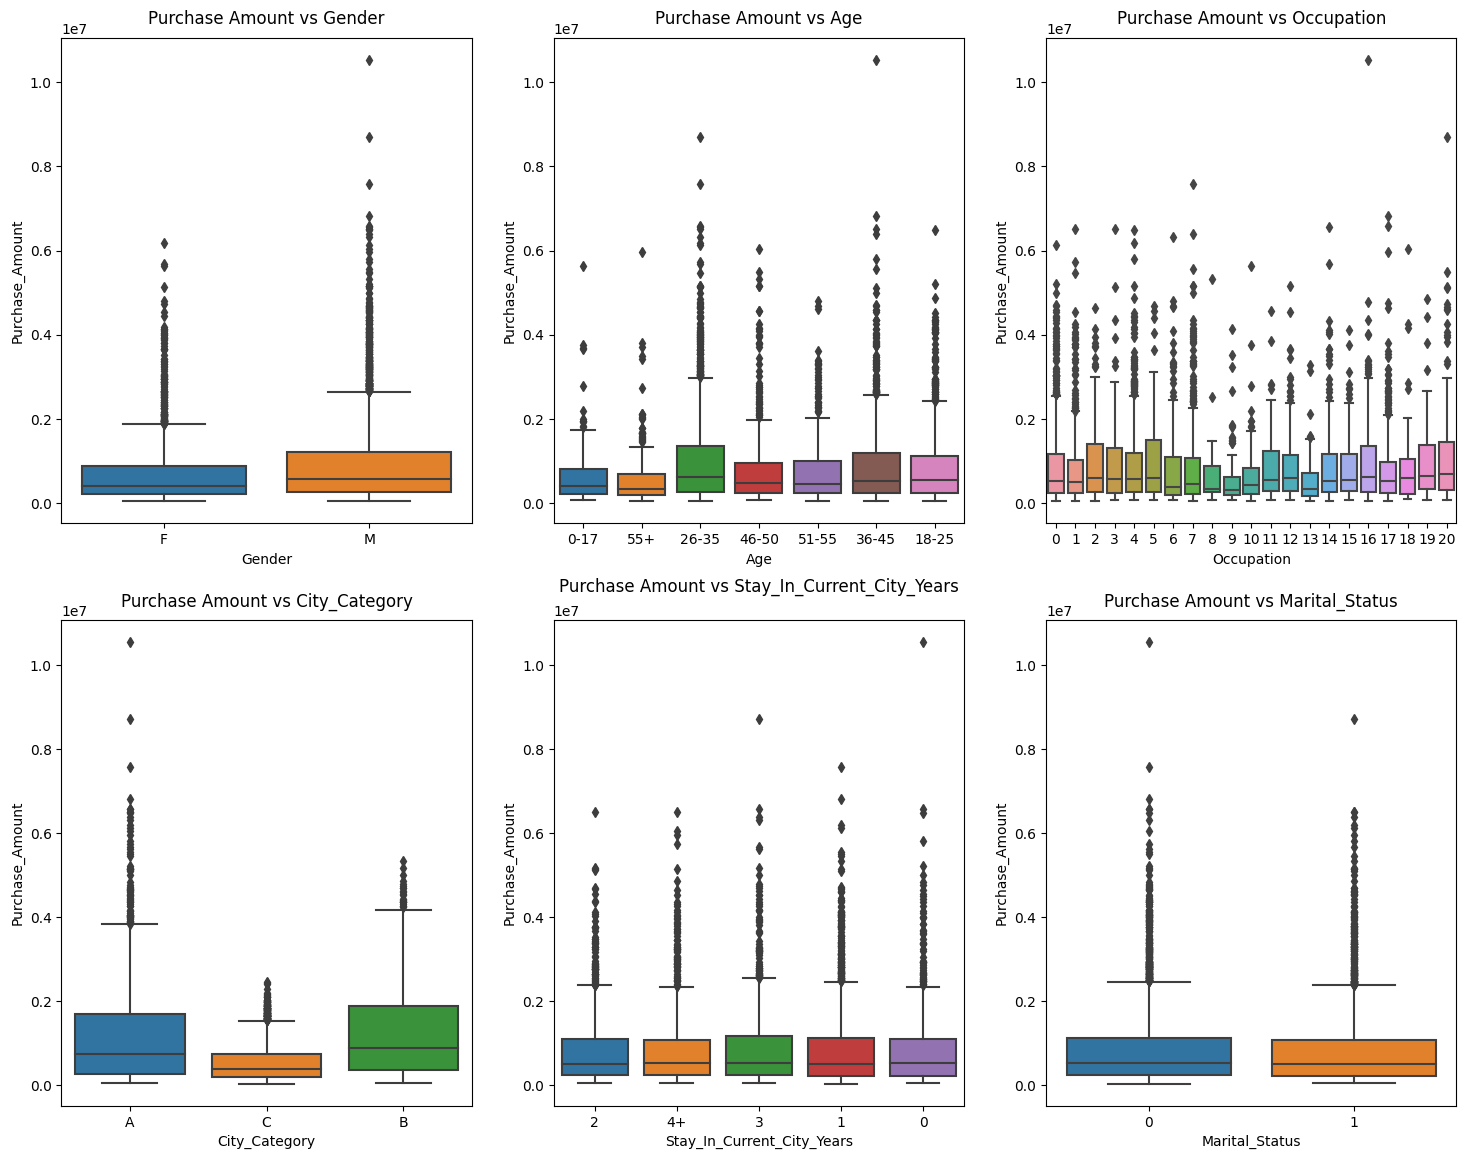

In [ ]:
columns = ["Gender","Age","Occupation",	"City_Category"	,"Stay_In_Current_City_Years",	"Marital_Status"]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1)
value = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=userdata, y='Purchase_Amount', x=columns[value], ax=axs[i,j])
        axs[i,j].set_title(f"Purchase Amount vs {columns[value]}", pad=10)
        value += 1

Observation:
*   Even though the number of female customers are really low, the total and median amount of their puchase is only slightlt lower than men.
*   The total and median amount of purchase from city c is lesser than others despite the fact there are more users from city c category
*   Though number of unmarried customers are more the total and mean amount of purcahse is doesnt vary much
*   Despite the differences in the number of users in different age groups and the time they have spend in the city the total and median amount of their puchase is somewhat similar.


---





**Multivariate Analysis**

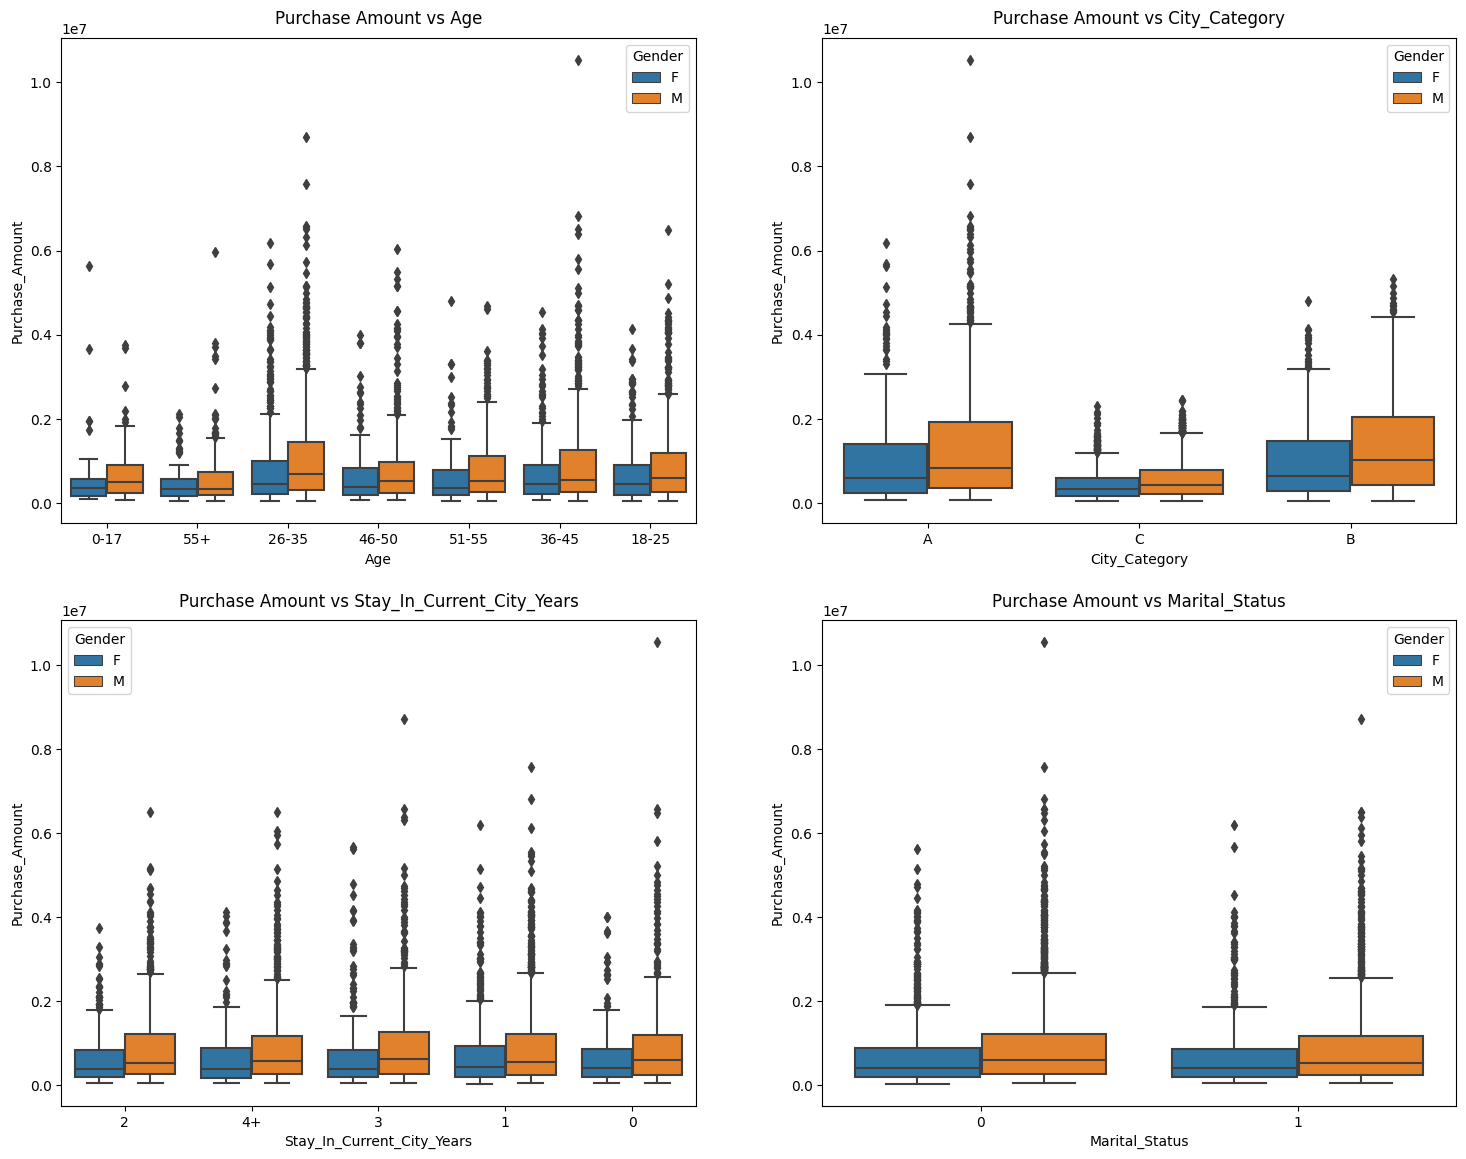

In [ ]:
# Effect of gender on the product purchase Amount
columns = ["Age",	"City_Category"	,"Stay_In_Current_City_Years",	"Marital_Status"]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1)
value = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=userdata, y='Purchase_Amount', hue = "Gender", x=columns[value], ax=axs[i,j])
        axs[i,j].set_title(f"Purchase Amount vs {columns[value]}", pad=10)
        value += 1

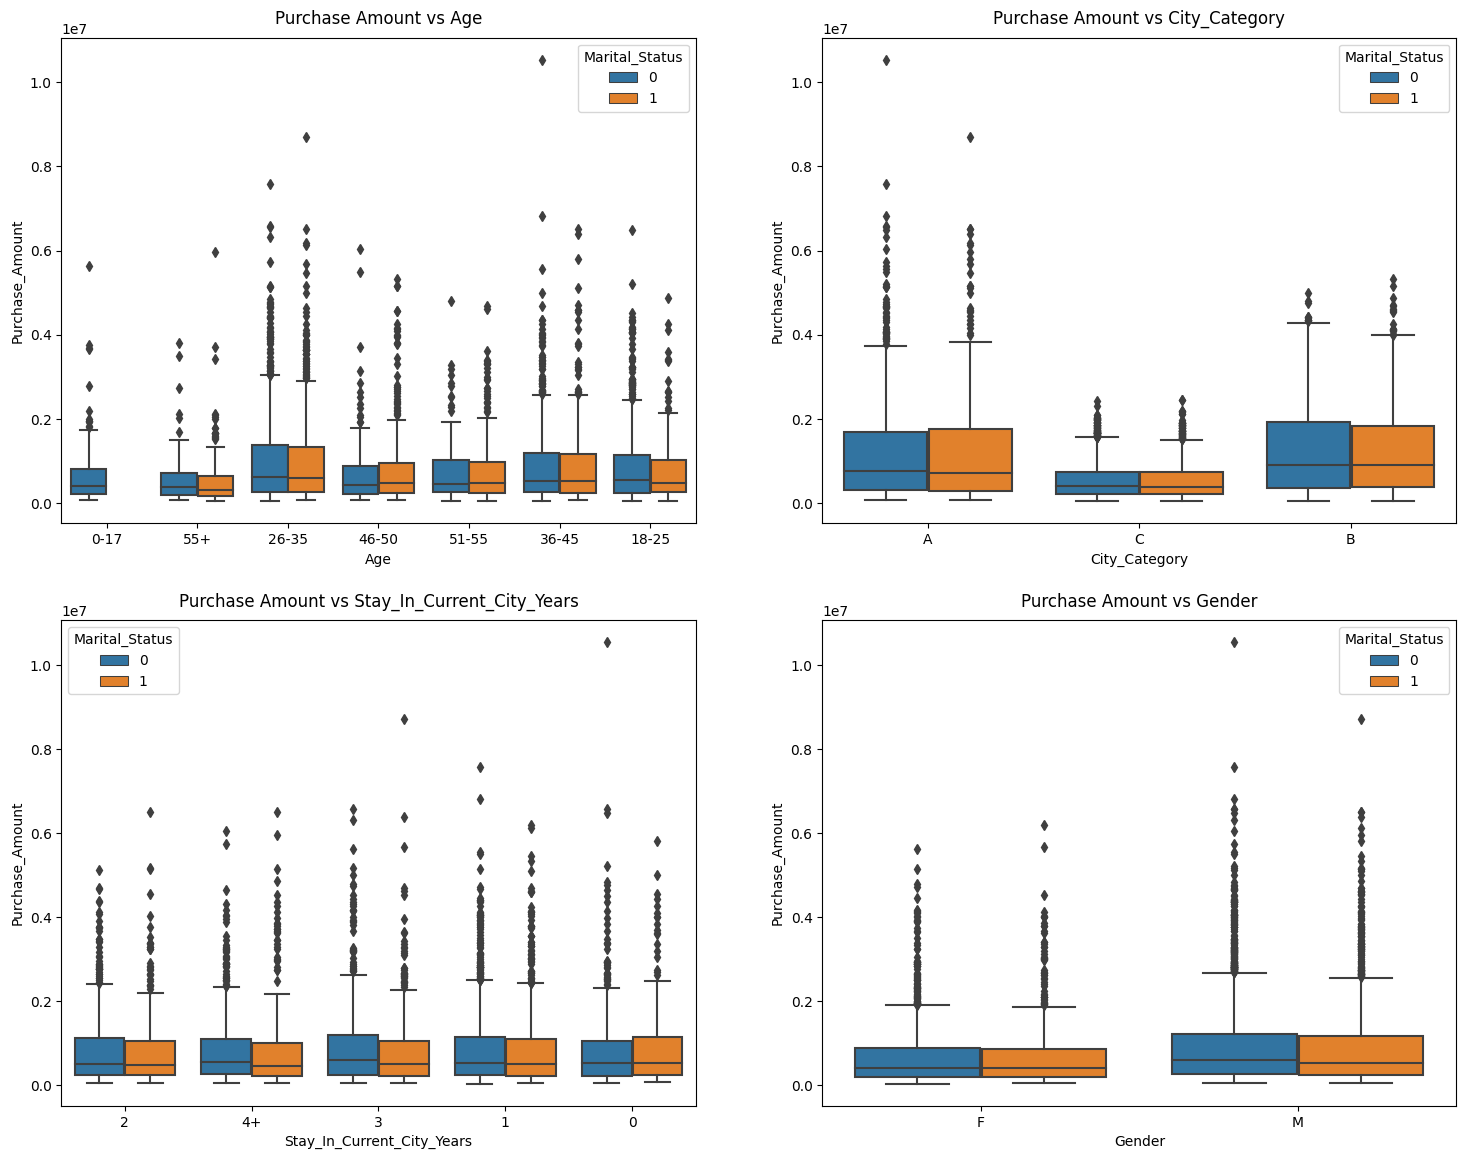

In [ ]:
# Effect of marital_status on the product purchase Amount
columns = ["Age",	"City_Category"	,"Stay_In_Current_City_Years",	"Gender"]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1)
value = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=userdata, y='Purchase_Amount', hue = "Marital_Status", x=columns[value], ax=axs[i,j])
        axs[i,j].set_title(f"Purchase Amount vs {columns[value]}", pad=10)
        value += 1

Observation:
*   The purchase amount  by the females is slightly lower than men
*   The purchase amount is similar for for unmarried and married people.

---





#	Business Insights based on Non- Graphical and Visual Analysis


*   The number of female customers are less than male customers
*   Even though the number of female customers are really low, the total and median amount of their puchase is only slightlt lower than men.
* The total and median amount of purchase from city c is lesser than others
despite the fact there are more users from city c category
*  Though number of unmarried customers are more the total and mean amount of purcahse is doesnt vary much
*  Despite the differences in the number of users in different age groups and the time they have spend in the city the total and median amount of their puchase is somewhat similar






# Statistical Studies
**GENDER**

Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers. calculating the average to find out an interval within which the population average will lie




In [ ]:
female_data = walmart[walmart["Gender"]=="F"]
x = female_data["Purchase"].mean()
n = female_data.shape[0]
sig = female_data["Purchase"].std()
# zmultipler for 95 percent confidence interval is 1.96
z = 1.96
l = x- ((1.96*sig)/(n**0.5))
u = x+ ((1.96*sig)/(n**0.5))
l,u

(8709.211081242413, 8759.920449068539)

In [ ]:
male_data = walmart[walmart["Gender"]=="M"]
x = male_data["Purchase"].mean()
n = male_data.shape[0]
sig = male_data["Purchase"].std()
# zmultipler for 95 percent confidence interval is 1.96
z = 1.96
l =round(x- ((1.96*sig)/(n**0.5)),2)
u =round( x+ ((1.96*sig)/(n**0.5)),2)
l,u


(9422.02, 9453.03)

Use the Central limit theorem to compute the interval

In [ ]:
# confidence interval from sample for amount spend Per transactions for female customers

female_user = walmart[walmart["Gender"]=="F"]
boots_sample_mean_list = []

for i in range (10000):
  boots_sample = np.random.choice(female_user["Purchase"],size=1000)
  boots_sample_mean = np.mean(boots_sample)
  boots_sample_mean_list.append( boots_sample_mean)

interval_90 = np.percentile(boots_sample_mean_list, [5, 95])
interval_95 = np.percentile(boots_sample_mean_list, [2.5, 97.5])
interval_99 = np.percentile(boots_sample_mean_list, [0.5, 99.5])
print("90% interval:",interval_90[0],":",interval_90[1])
print("95% interval:",interval_95[0],":",interval_95[1])
print("99% interval:",interval_99[0],":",interval_99[1])

90% interval: 8485.732549999999 : 8981.95215
95% interval: 8440.57605 : 9028.807775
99% interval: 8363.139089999999 : 9125.64453


In [ ]:
# confidence interval from sample for amount spend Per transactions for male customers
male_user = walmart[walmart["Gender"]=="M"]
boots_sample_mean_list = []

for i in range (10000):
  boots_sample = np.random.choice(male_user["Purchase"],size=10000)
  boots_sample_mean = np.mean(boots_sample)
  boots_sample_mean_list.append( boots_sample_mean)

interval_90 = np.percentile(boots_sample_mean_list, [5, 95])
interval_95 = np.percentile(boots_sample_mean_list, [2.5, 97.5])
interval_99 = np.percentile(boots_sample_mean_list, [0.5, 99.5])
print("90% interval:",interval_90[0],":",interval_90[1])
print("95% interval:",interval_95[0],":",interval_95[1])
print("99% interval:",interval_99[0],":",interval_99[1])

90% interval: 9352.321245 : 9521.694095
95% interval: 9335.222754999999 : 9538.1546825
99% interval: 9302.8199025 : 9570.90085


# Answering Questions
1.	Are women spending more money per transaction than men? Why or Why not?
    *  Women are spending less money per transaction than men. The average spending of females is between 8489.7: 8990.8(with 90% confidence level)where as males fall under 9352.9:9523.7 (with 90% confidence level)



2.	Confidence intervals and distribution of the mean of the expenses by female and male customers

In [ ]:
# confidence interval from sample for mean of the expenses for female customers

female_user = userdata[userdata["Gender"]=="F"]
boots_sample_mean_list = []

for i in range (10000):

  boots_sample = np.random.choice(female_user["Avg_purchase_Amt"],size=1000)

  boots_sample_mean = np.mean(boots_sample)

  boots_sample_mean_list.append( boots_sample_mean)

interval_90 = np.percentile(boots_sample_mean_list, [5, 95])
interval_95 = np.percentile(boots_sample_mean_list, [2.5, 97.5])
interval_99 = np.percentile(boots_sample_mean_list, [0.5, 99.5])
print("90% interval:",interval_90[0],":",interval_90[1])
print("95% interval:",interval_95[0],":",interval_95[1])
print("99% interval:",interval_99[0],":",interval_99[1])

90% interval: 8878.1963815 : 9054.263755
95% interval: 8860.492316 : 9072.802079250003
99% interval: 8827.427144450001 : 9105.4846975


In [ ]:
# confidence interval from sample for mean of the expenses for male customers
male_user = userdata[userdata["Gender"]=="M"]
boots_sample_mean_list = []

for i in range (10000):

  boots_sample = np.random.choice(male_user["Avg_purchase_Amt"],size=10000)

  boots_sample_mean = np.mean(boots_sample)

  boots_sample_mean_list.append( boots_sample_mean)

interval_90 = np.percentile(boots_sample_mean_list, [5, 95])
interval_95 = np.percentile(boots_sample_mean_list, [2.5, 97.5])
interval_99 = np.percentile(boots_sample_mean_list, [0.5, 99.5])
print("90% interval:",interval_90[0],":",interval_90[1])
print("95% interval:",interval_95[0],":",interval_95[1])
print("99% interval:",interval_99[0],":",interval_99[1])

90% interval: 9775.5427818 : 9837.5362118
95% interval: 9769.858178550001 : 9843.228991025
99% interval: 9758.753226935 : 9855.758124899998


2.	Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
    *  Confidence interval from sample for amount spend Per transactions for female customers for 95% interval: 8444.6 : 9038.7.
    * Confidence interval from sample for amount spend Per transactions for male customers for 95% interval: 9352.9 : 9523.7
    * There is no overlap in amount spend per transactions based on gender.
    * Confidence interval from sample for mean of the expenses for female customers 95% interval: 8859.8 : 9069.9
    *  Confidence interval from sample for mean of the expenses for male customers 95% interval: 9769.8 : 9843.8
    *  There is no overlap in amount mean of the expenses based on gender.
    *  As there are no significat overlap, and spending tendency of male customers beign more than females, walmart can focus on products catered to males on blackfriday than females.
    * revenue is more from males than females on blackfriday



---



**Marital status**

In [ ]:
single_data = walmart[walmart["Marital_Status"]==0]
x = single_data["Purchase"].mean()
n = single_data.shape[0]
sig = single_data["Purchase"].std()
# zmultipler for 95 percent confidence interval is 1.96
z = 1.96
l = x- ((1.96*sig)/(n**0.5))
u = x+ ((1.96*sig)/(n**0.5))
l,u

(9248.61610045097, 9283.199137392043)

In [ ]:
married_data = walmart[walmart["Marital_Status"]==1]
x = married_data["Purchase"].mean()
n = married_data.shape[0]
sig = married_data["Purchase"].std()
# zmultipler for 95 percent confidence interval is 1.96
z = 1.96
l =round(x- ((1.96*sig)/(n**0.5)),2)
u =round( x+ ((1.96*sig)/(n**0.5)),2)
l,u

(9240.46, 9281.89)

In [ ]:
# confidence interval from sample for amount spend Per transactions for single customers

single_user = walmart[walmart["Marital_Status"]==0]
boots_sample_mean_list = []

for i in range (10000):

  boots_sample = np.random.choice(single_user["Purchase"],size=1000)

  boots_sample_mean = np.mean(boots_sample)

  boots_sample_mean_list.append( boots_sample_mean)

interval_90 = np.percentile(boots_sample_mean_list, [5, 95])
interval_95 = np.percentile(boots_sample_mean_list, [2.5, 97.5])
interval_99 = np.percentile(boots_sample_mean_list, [0.5, 99.5])
print("90% interval:",interval_90[0],":",interval_90[1])
print("95% interval:",interval_95[0],":",interval_95[1])
print("99% interval:",interval_99[0],":",interval_99[1])

90% interval: 9005.4112 : 9525.1361
95% interval: 8953.868825 : 9574.810575
99% interval: 8851.140805 : 9685.230875


In [ ]:
# confidence interval from sample for amount spend Per transactions for married customers
married_user = walmart[walmart["Marital_Status"]==1]
boots_sample_mean_list = []

for i in range (10000):

  boots_sample = np.random.choice(married_user["Purchase"],size=10000)

  boots_sample_mean = np.mean(boots_sample)

  boots_sample_mean_list.append( boots_sample_mean)

interval_90 = np.percentile(boots_sample_mean_list, [5, 95])
interval_95 = np.percentile(boots_sample_mean_list, [2.5, 97.5])
interval_99 = np.percentile(boots_sample_mean_list, [0.5, 99.5])
print("90% interval:",interval_90[0],":",interval_90[1])
print("95% interval:",interval_95[0],":",interval_95[1])
print("99% interval:",interval_99[0],":",interval_99[1])

90% interval: 9179.74531 : 9343.030535
95% interval: 9164.23424 : 9358.8993725
99% interval: 9133.765115499999 : 9388.741761500001


In [ ]:
# confidence interval from sample for mean of the expenses for unmarried customers

single_user = userdata[userdata["Marital_Status"]==0]
boots_sample_mean_list = []

for i in range (10000):

  boots_sample = np.random.choice(single_user["Avg_purchase_Amt"],size=1000)

  boots_sample_mean = np.mean(boots_sample)

  boots_sample_mean_list.append( boots_sample_mean)

interval_90 = np.percentile(boots_sample_mean_list, [5, 95])
interval_95 = np.percentile(boots_sample_mean_list, [2.5, 97.5])
interval_99 = np.percentile(boots_sample_mean_list, [0.5, 99.5])
print("90% interval:",interval_90[0],":",interval_90[1])
print("95% interval:",interval_95[0],":",interval_95[1])
print("99% interval:",interval_99[0],":",interval_99[1])

90% interval: 9467.4255665 : 9659.009105
95% interval: 9449.41507175 : 9679.23708525
99% interval: 9413.384613100001 : 9716.6610598


In [ ]:
# confidence interval from sample for mean of the expenses for married customers
married_user = userdata[userdata["Marital_Status"]==1]
boots_sample_mean_list = []

for i in range (10000):

  boots_sample = np.random.choice(married_user["Avg_purchase_Amt"],size=10000)

  boots_sample_mean = np.mean(boots_sample)

  boots_sample_mean_list.append( boots_sample_mean)

interval_90 = np.percentile(boots_sample_mean_list, [5, 95])
interval_95 = np.percentile(boots_sample_mean_list, [2.5, 97.5])
interval_99 = np.percentile(boots_sample_mean_list, [0.5, 99.5])
print("90% interval:",interval_90[0],":",interval_90[1])
print("95% interval:",interval_95[0],":",interval_95[1])
print("99% interval:",interval_99[0],":",interval_99[1])

90% interval: 9544.0710723 : 9605.37703175
95% interval: 9537.792298575001 : 9611.4711364
99% interval: 9525.6868619 : 9622.40028909


# Answering Questions
1.	Are single people spending more money per transaction than married people? Why or Why not?
    *  single people have similar spending patterns as married people. The average spending of single people is between 9005.7 : 9534.1(with 90% confidence level)where as married people fall under 9178.6 : 9344.2 (with 90% confidence level)

2.	Are confidence intervals of average married and unmmaried spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
    *  Confidence interval from sample for amount spend Per transactions for unmmaried customers for 95% interval: 8956.3 : 9587.6
    * Confidence interval from sample for amount spend Per transactions for married customers for 95% interval: 9162.5 : 9360.4
    * There is overlap in amount spend per transactions based on marital status.
    * Confidence interval from sample for mean of the expenses for unmarried customers 95% interval: 9449.1 : 9680.1
    *  Confidence interval from sample for mean of the expenses for married customers 95% interval: 9537.2 : 9612.4
    *  There is overlap in amount mean of the expenses based on Marital status.
    * Even though the number of unmarried customers are more,the revenue generated from both unmarried and married people are almost same. both the groups shoud be equally treated for black friday sale.
---



**Age**

In [ ]:
age_below_26 = walmart[(walmart["Age"]== "0-17")|(walmart["Age"]== "18-25")]
age_below_46 = walmart[(walmart["Age"]== "26-35")|(walmart["Age"]== "36-45")]
age_below_55 = walmart[(walmart["Age"]== "46-50")|(walmart["Age"]== "51-55")]
age_above_55 = walmart[(walmart["Age"]== "55+")]
Age_bin=[age_below_26,age_below_46,age_below_55,age_above_55]
string =["age_below_26","age_below_46","age_below_55","age_above_55"]
lstoflst =[]
for i in Age_bin:
  age = i["Purchase"]
  boots_Sample_mean_list = []
  for k in range (10000):
    boots_Sample = np.random.choice(age,size=1000)
    boots_Sample_mean = np.mean(boots_Sample)
    boots_Sample_mean_list.append( boots_Sample_mean)
  lstoflst.append(boots_Sample_mean_list)
value = 0
for lst in lstoflst:
    interval_95 = np.percentile(lst, [2.5, 97.5])
    print(string[value],"95% confidence interval:",interval_95[0],":",interval_95[1])
    value +=1

age_below_26 95% confidence interval: 8832.9979 : 9450.135325
age_below_46 95% confidence interval: 8968.730174999999 : 9589.889925
age_below_55 95% confidence interval: 9043.603 : 9668.345725
age_above_55 95% confidence interval: 9030.252325 : 9652.014875


In [ ]:
age_below_26 = userdata[(userdata["Age"]== "0-17")|(userdata["Age"]== "18-25")]
age_below_46 = userdata[(userdata["Age"]== "26-35")|(userdata["Age"]== "36-45")]
age_below_55 = userdata[(userdata["Age"]== "46-50")|(userdata["Age"]== "51-55")]
age_above_55 = userdata[(userdata["Age"]== "55+")]
Age_bin=[age_below_26,age_below_46,age_below_55,age_above_55]
string =["age_below_26","age_below_46","age_below_55","age_above_55"]
lstoflst =[]
for i in Age_bin:
  age = i["Avg_purchase_Amt"]
  boots_Sample_mean_list = []
  for k in range (10000):
    boots_Sample = np.random.choice(age,size=1000)
    boots_Sample_mean = np.mean(boots_Sample)
    boots_Sample_mean_list.append( boots_Sample_mean)
  lstoflst.append(boots_Sample_mean_list)
value = 0
for lst in lstoflst:
    interval_95 = np.percentile(lst, [2.5, 97.5])
    print(string[value],"95% confidence interval:",interval_95[0],":",interval_95[1])
    value +=1

age_below_26 95% confidence interval: 9301.18438875 : 9550.47170175
age_below_46 95% confidence interval: 9521.55316575 : 9751.821448499999
age_below_55 95% confidence interval: 9479.865138500001 : 9712.45294975
age_above_55 95% confidence interval: 9282.99606575 : 9529.17465675


In [ ]:
age_below_26 = userdata[(userdata["Age"]== "0-17")|(userdata["Age"]== "18-25")]
age_below_46 = userdata[(userdata["Age"]== "26-35")|(userdata["Age"]== "36-45")]
age_below_55 = userdata[(userdata["Age"]== "46-50")|(userdata["Age"]== "51-55")]
age_above_55 = userdata[(userdata["Age"]== "55+")]
Age_bin=[age_below_26,age_below_46,age_below_55,age_above_55]
string =["age_below_26","age_below_46","age_below_55","age_above_55"]
lstoflst =[]
for i in Age_bin:
  age = i["Purchase_Amount"]
  boots_Sample_mean_list = []
  for k in range (10000):
    boots_Sample = np.random.choice(age,size=1000)
    boots_Sample_mean = np.mean(boots_Sample)
    boots_Sample_mean_list.append( boots_Sample_mean)
  lstoflst.append(boots_Sample_mean_list)
value = 0
for lst in lstoflst:
    interval_95 = np.percentile(lst, [2.5, 97.5])
    print(string[value],"95% confidence interval:",interval_95[0],":",interval_95[1])
    value +=1

age_below_26 95% confidence interval: 761236.2335249999 : 870069.593025
age_below_46 95% confidence interval: 887769.300375 : 1015540.2705249999
age_below_55 95% confidence interval: 726448.706325 : 832904.2597
age_above_55 95% confidence interval: 502343.93895 : 578416.8121499999


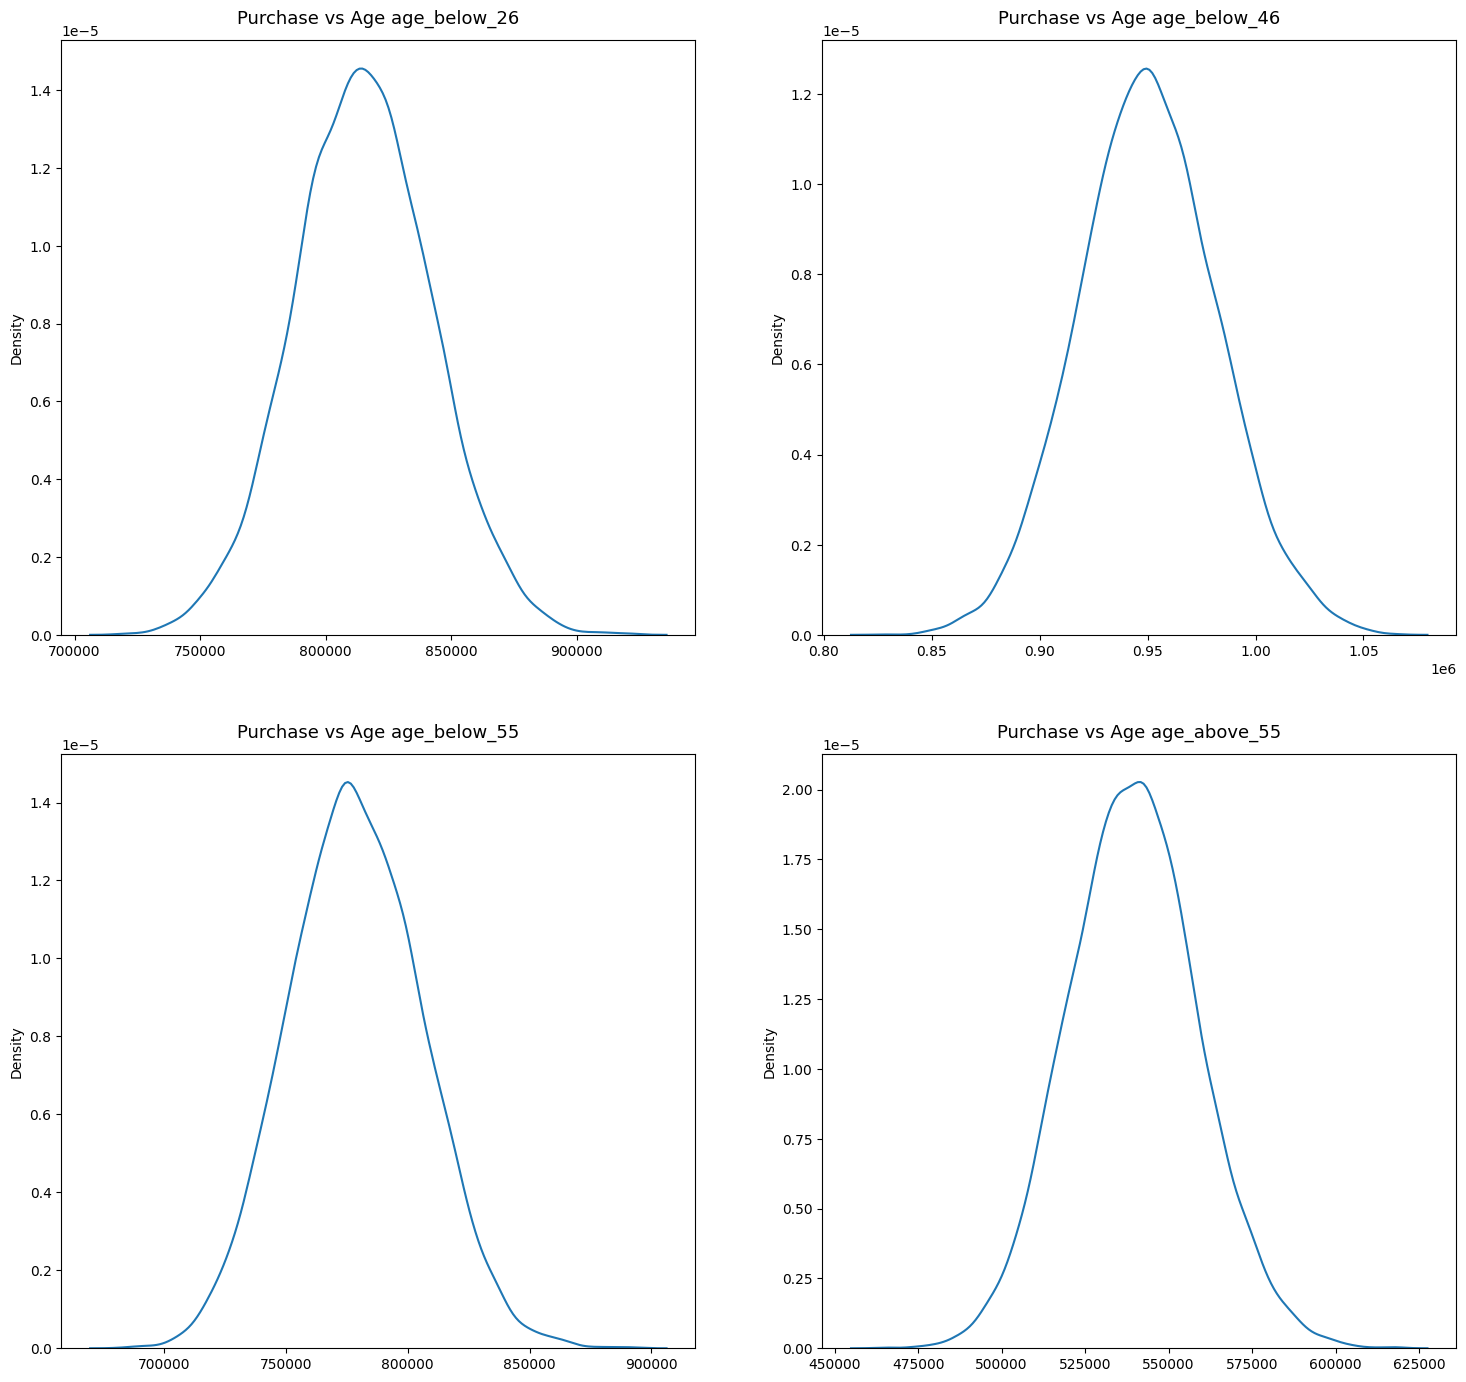

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
  for j in range (2):
        sns.kdeplot(lstoflst[count], ax=axs[i,j])
        axs[i,j].set_title(f"Purchase vs Age {string[count]}", pad=12, fontsize=13)
        count +=1


Answeering Questions:
1. who is spending more money?
  *   Customers in age group 26-45 tend to purchase more than customers other groups.
  *   the mean expense of purchase of the age group 26-45 is similar to the other group.
*   There is a significant overlap of the expense per transcations of all age group.
*   There is a significant  overlap in the mean expenser per transcation of users in all age group.





# Business insights
1. Males are likely to spend more than females
2. Single customers are likely to spend more than married customers.
3. Young and middle-aged adults are more likely to spend in comparison
with others.
4. Customers from city B are spending highest among all three cities, followed by customers of city A.
5. single and married customers tend to have same kind of purchase power. number of single customers are more. but the mean purchase power of married couples are more
6.males are likely to make more purchase than females.also the number of male customers are sigificantly high

#  Recommendations
Males should be targetted more than females since:


*   The mean amount spent per transaction is higher for males than that of
females (with 95% C)
*  The mean number of transacctions per males is higher than that of females
*  The mean amount spent per male is higher than that of females (with 95% C)

For new product launch, products relevant to young/miidle aged customers should be launched before targetting any other age bracket

*   Customers in age group 26-45 should get more priority than those above 45. We have concluded that customers in age 26-45 tend to have a higher mean value of amount spent.

*   During Black-Friday, Walmart can launch/stock up products catered to males and also audience in age [26-45] to boost up their revenue
*   To boost the average amount spent bt females, some marketing campaign can be launched to attract females and encourage them to make more purchases.
